In [72]:
from feature_engeeniring import Interpolation, TranformTimeSeries , Lags, RollingMeanAverage, RollingMeanExponential, RollingStdAverage, RollingStdExponential, DayWeekYear, DinamicsForTimeSeries
from pipeline_gatehering import GatheringData
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.figsize'] = [20,8]
warnings.filterwarnings('ignore')


from statsmodels.graphics.gofplots import qqplot
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
%%time
kw_list = [
          'bitcoin', 
          'bitcoin price',
          'bitcoin usd',
          'bitcoin kurs',
            'Bitcoin.com',
            'Bitcoin Gold',
           'BTC-USD',     
            'Bitcoin Cash',
           'binance',
    
    
            'cryptocurrency',
            'cryptocurrency bitcoin',
           'news cryptocurrency',
           'crypto',
           'buy bitcoin',
           'bitcoin stock',
           'best cryptocurrency',
           'cryptocurrency market',
           'buy cryptocurrency',
           'what is cryptocurrency',
           'cryptocurrency exchange',
          ]

kw_list_yahoo = ['BTC-USD']


get_data = GatheringData()
df_trends = get_data.get_from_google_trends(kw_list=kw_list, resample='D')
df_yahoo = get_data.get_from_yahoo(kw_list=kw_list_yahoo)
df_resulting = get_data.get_resulting_from_sources()
# df_resulting = get_data.drop_columns_result_data(columns=)

In [4]:
# df_resulting.head()
columns_drop = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df_resulting = get_data.drop_columns_result_data(columns=columns_drop)
df_resulting.head()

Close  bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-10  421.563995      2.0            1.0          2.0           1.0   
2016-04-11  422.483002      NaN            NaN          NaN           NaN   
2016-04-12  425.190002      NaN            NaN          NaN           NaN   
2016-04-13  423.734009      NaN            NaN          NaN           NaN   
2016-04-14  424.282013      NaN            NaN          NaN           NaN   

            Bitcoin.com  Bitcoin Gold  BTC-USD  Bitcoin Cash  binance  ...  \
2016-04-10          2.0           1.0     21.0           0.0      0.0  ...   
2016-04-11          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-12          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-13          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-14          NaN           NaN      NaN           NaN      NaN  ...   

            cryptocurrency bitcoin  news cryptocurrency  crypto  buy bitcoin  \
2016-04-10                     1.0                  0.0     2.0          2.0   
2016-04-11                     NaN                  NaN     NaN          NaN   
2016-04-12                     NaN                  NaN     NaN          NaN   
2016-04-13                     NaN                  NaN     NaN          NaN   
2016-04-14                     NaN                  NaN     NaN          NaN   

            bitcoin stock  best cryptocurrency  cryptocurrency market  \
2016-04-10            0.0                  0.0                    1.0   
2016-04-11            NaN                  NaN                    NaN   
2016-04-12            NaN                  NaN                    NaN   
2016-04-13            NaN                  NaN                    NaN   
2016-04-14            NaN                  NaN                    NaN   

            buy cryptocurrency  what is cryptocurrency  \
2016-04-10                 0.0                     0.0   
2016-04-11                 NaN                     NaN   
2016-04-12                 NaN                     NaN   
2016-04-13                 NaN                     NaN   
2016-04-14                 NaN                     NaN   

            cryptocurrency exchange  
2016-04-10                      1.0  
2016-04-11                      NaN  
2016-04-12                      NaN  
2016-04-13                      NaN  
2016-04-14                      NaN  

[5 rows x 21 columns]

In [5]:
df_resulting.to_csv('../../data_dm/eduard/df_resulting.csv')

In [2]:
df_resulting = pd.read_csv('../../data_dm/eduard/df_resulting.csv', header=0, index_col=0, parse_dates=True, dtype='float32')
df_resulting.head()

Close  bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-10  421.563995      2.0            1.0          2.0           1.0   
2016-04-11  422.483002      NaN            NaN          NaN           NaN   
2016-04-12  425.190002      NaN            NaN          NaN           NaN   
2016-04-13  423.734009      NaN            NaN          NaN           NaN   
2016-04-14  424.282013      NaN            NaN          NaN           NaN   

            Bitcoin.com  Bitcoin Gold  BTC-USD  Bitcoin Cash  binance  ...  \
2016-04-10          2.0           1.0     21.0           0.0      0.0  ...   
2016-04-11          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-12          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-13          NaN           NaN      NaN           NaN      NaN  ...   
2016-04-14          NaN           NaN      NaN           NaN      NaN  ...   

            cryptocurrency bitcoin  news cryptocurrency  crypto  buy bitcoin  \
2016-04-10                     1.0                  0.0     2.0          2.0   
2016-04-11                     NaN                  NaN     NaN          NaN   
2016-04-12                     NaN                  NaN     NaN          NaN   
2016-04-13                     NaN                  NaN     NaN          NaN   
2016-04-14                     NaN                  NaN     NaN          NaN   

            bitcoin stock  best cryptocurrency  cryptocurrency market  \
2016-04-10            0.0                  0.0                    1.0   
2016-04-11            NaN                  NaN                    NaN   
2016-04-12            NaN                  NaN                    NaN   
2016-04-13            NaN                  NaN                    NaN   
2016-04-14            NaN                  NaN                    NaN   

            buy cryptocurrency  what is cryptocurrency  \
2016-04-10                 0.0                     0.0   
2016-04-11                 NaN                     NaN   
2016-04-12                 NaN                     NaN   
2016-04-13                 NaN                     NaN   
2016-04-14                 NaN                     NaN   

            cryptocurrency exchange  
2016-04-10                      1.0  
2016-04-11                      NaN  
2016-04-12                      NaN  
2016-04-13                      NaN  
2016-04-14                      NaN  

[5 rows x 21 columns]

In [3]:
df_resulting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2016-04-10 to 2021-04-11
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Close                    1824 non-null   float32
 1   bitcoin                  260 non-null    float32
 2   bitcoin price            260 non-null    float32
 3   bitcoin usd              260 non-null    float32
 4   bitcoin kurs             260 non-null    float32
 5   Bitcoin.com              260 non-null    float32
 6   Bitcoin Gold             260 non-null    float32
 7   BTC-USD                  260 non-null    float32
 8   Bitcoin Cash             260 non-null    float32
 9   binance                  260 non-null    float32
 10  cryptocurrency           260 non-null    float32
 11  cryptocurrency bitcoin   260 non-null    float32
 12  news cryptocurrency      260 non-null    float32
 13  crypto                   260 non-null    float32
 14  buy bi

In [4]:
columns_results = df_resulting.columns.to_list()

columns_TranformTimeSeries = ['Close']
columns_Lags = columns_results
columns_RollingMeanAverage = columns_results
columns_RollingStdAverage = columns_results
columns_RollingMeanExponential = columns_results
columns_RollingStdExponential = columns_results
columns_DinamicsForTimeSeries = ['Close']
lags = 4
com = 0.3
window = 7

pipeline = Pipeline([('Interpolation', Interpolation()),
    
                    ('TranformTimeSeries', TranformTimeSeries(box_cox=columns_TranformTimeSeries)),
                     
                    ('Lags',Lags(lags=lags, 
                                 columns=columns_Lags)),
                      
                    ('RollingMeanAverage', RollingMeanAverage(window=window,
                                                              columns=columns_RollingMeanAverage)),
                      
                    ('RollingStdAverage', RollingStdAverage(window=window, 
                                                            columns=columns_RollingStdAverage)),
                      
                    ('RollingMeanExponential', RollingMeanExponential(window=window, 
                                                                      columns=columns_RollingMeanExponential)),
                      
                    ('RollingStdExponential', RollingStdExponential(window=window, 
                                                                    columns=columns_RollingStdExponential)),
                    ('DayWeekYear', DayWeekYear()),
                    ('DinamicsForTimeSeries', DinamicsForTimeSeries(columns=columns_DinamicsForTimeSeries))])

pipeline.fit(df_resulting)
X_transformed = pipeline.transform(df_resulting)
X_transformed.head()

column:	Close


/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/stats/morestats.py:906: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/numpy/core/_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Close   bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-28  2.571453  3.428571            1.0          2.0      1.000000   
2016-04-29  2.576812  3.285714            1.0          2.0      1.000000   
2016-04-30  2.570838  3.142857            1.0          2.0      1.000000   
2016-05-01  2.573982  3.000000            1.0          2.0      1.000000   
2016-05-02  2.567591  2.857143            1.0          2.0      0.857143   

            Bitcoin.com  Bitcoin Gold  BTC-USD  Bitcoin Cash  binance  ...  \
2016-04-28     2.428571      1.000000      0.0           0.0      0.0  ...   
2016-04-29     2.285714      1.000000      0.0           0.0      0.0  ...   
2016-04-30     2.142857      1.000000      0.0           0.0      0.0  ...   
2016-05-01     2.000000      1.000000      0.0           0.0      0.0  ...   
2016-05-02     1.714286      0.857143      0.0           0.0      0.0  ...   

            best cryptocurrency_ewn_std_7  cryptocurrency market_ewn_std_7  \
2016-04-28                       0.000000                         0.135978   
2016-04-29                       0.000000                         0.163373   
2016-04-30                       0.000000                         0.183322   
2016-05-01                       0.000000                         0.196943   
2016-05-02                       0.090646                         0.147428   

            buy cryptocurrency_ewn_std_7  what is cryptocurrency_ewn_std_7  \
2016-04-28                           0.0                          0.135978   
2016-04-29                           0.0                          0.163373   
2016-04-30                           0.0                          0.183322   
2016-05-01                           0.0                          0.196943   
2016-05-02                           0.0                          0.132555   

            cryptocurrency exchange_ewn_std_7  weak  month  year  weekDay  \
2016-04-28                           0.135978    17      4  2016        3   
2016-04-29                           0.163373    17      4  2016        4   
2016-04-30                           0.183322    17      4  2016        5   
2016-05-01                           0.196943    17      5  2016        6   
2016-05-02                           0.147428    18      5  2016        0   

            Close_dinamic  
2016-04-28       1.001498  
2016-04-29       1.002084  
2016-04-30       0.997682  
2016-05-01       1.001223  
2016-05-02       0.997517  

[5 rows x 551 columns]

In [5]:
X_transformed = X_transformed.astype('float32')
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1810 entries, 2016-04-28 to 2021-04-11
Columns: 551 entries, Close to Close_dinamic
dtypes: float32(551)
memory usage: 3.8 MB


In [6]:
X_transformed.Close = X_transformed['Close'].shift(1)
X_transformed.dropna(inplace=True)
print(X_transformed.info())
X_transformed.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809 entries, 2016-04-29 to 2021-04-11
Columns: 551 entries, Close to Close_dinamic
dtypes: float32(551)
memory usage: 3.8 MB
None


Close   bitcoin  bitcoin price  bitcoin usd  bitcoin kurs  \
2016-04-29  2.571453  3.285714            1.0          2.0      1.000000   
2016-04-30  2.576812  3.142857            1.0          2.0      1.000000   
2016-05-01  2.570838  3.000000            1.0          2.0      1.000000   
2016-05-02  2.573982  2.857143            1.0          2.0      0.857143   
2016-05-03  2.567591  2.714286            1.0          2.0      0.714286   

            Bitcoin.com  Bitcoin Gold  BTC-USD  Bitcoin Cash  binance  ...  \
2016-04-29     2.285714      1.000000      0.0           0.0      0.0  ...   
2016-04-30     2.142857      1.000000      0.0           0.0      0.0  ...   
2016-05-01     2.000000      1.000000      0.0           0.0      0.0  ...   
2016-05-02     1.714286      0.857143      0.0           0.0      0.0  ...   
2016-05-03     1.428571      0.714286      0.0           0.0      0.0  ...   

            best cryptocurrency_ewn_std_7  cryptocurrency market_ewn_std_7  \
2016-04-29                       0.000000                         0.163373   
2016-04-30                       0.000000                         0.183322   
2016-05-01                       0.000000                         0.196943   
2016-05-02                       0.090645                         0.147428   
2016-05-03                       0.143880                         0.102616   

            buy cryptocurrency_ewn_std_7  what is cryptocurrency_ewn_std_7  \
2016-04-29                           0.0                          0.163373   
2016-04-30                           0.0                          0.183322   
2016-05-01                           0.0                          0.196943   
2016-05-02                           0.0                          0.132555   
2016-05-03                           0.0                          0.133657   

            cryptocurrency exchange_ewn_std_7  weak  month    year  weekDay  \
2016-04-29                           0.163373  17.0    4.0  2016.0      4.0   
2016-04-30                           0.183322  17.0    4.0  2016.0      5.0   
2016-05-01                           0.196943  17.0    5.0  2016.0      6.0   
2016-05-02                           0.147428  18.0    5.0  2016.0      0.0   
2016-05-03                           0.102616  18.0    5.0  2016.0      1.0   

            Close_dinamic  
2016-04-29       1.002084  
2016-04-30       0.997682  
2016-05-01       1.001223  
2016-05-02       0.997517  
2016-05-03       1.001949  

[5 rows x 551 columns]

In [7]:
X = X_transformed.drop('Close', axis=1).copy()
y = X_transformed['Close'].copy()

percentage = 0.1
train_len = int(X_transformed.shape[0] * 0.1)

X_train , X_test, y_train, y_test = X.iloc[:-train_len,:], X.iloc[-train_len:,:], y[:-train_len], y[-train_len:]

print(f'X_train:\t{X_train.shape}')
print(f'X_test:\t{X_test.shape}')
print(f'y_train:\t{y_train.shape}')
print(f'y_test:\t{y_test.shape}')

X_train:	(1629, 550)
X_test:	(180, 550)
y_train:	(1629,)
y_test:	(180,)


## Finding the best models

In [8]:
import evalml
from evalml import AutoMLSearch

In [9]:
# %%time
automl = AutoMLSearch(X_train=X_train, y_train=y_train,
                     problem_type='regression',
                     objective='r2',
                      additional_objectives=['mae','mse','root mean squared error']
                     )
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: extra_trees, catboost, linear_model, decision_tree, xgboost, lightgbm, random_forest



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mean Baseline Regression Pipeline        Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: -0.003
High coefficient of variation (cv >= 0.2) within cross validation scores. Mean Baseline Regression Pipeline may not perform as estimated on unseen data.
Batch 1: (2/9) Decision Tree Regressor w/ Imputer       Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean R2: 0.999
Batch 1: (3/9) Extra Trees Regressor w/ Imputer         Elapsed:00:09
	Starting cross validation
	Finished cross validation - mean R2: 0.999
Batch 1: (4/9) XGBoost Regressor w/ Imputer             Elapsed:00:19
	Starting cross validation
	Finished cross validation - mean R2: 0.999
Batch 1: (5/9) CatBoost Regressor w/ Imputer            Elapsed:00:30
	Starting cross validation
	Finished cross validation - mean R2: 0.417
Batch 1: (6/9) Random Forest Regressor w/ Imputer       Elapsed:00:39
	Starting cross validation
	Finished cross validation - mean R2: 0.999


In [10]:
automl.save('models/automl_bitcoin.pkl')

In [11]:
automl.rankings

id                                      pipeline_name     score  \
0   7      Linear Regressor w/ Imputer + Standard Scaler  0.999999   
1   3                       XGBoost Regressor w/ Imputer  0.999494   
2   5                 Random Forest Regressor w/ Imputer  0.999308   
3   2                   Extra Trees Regressor w/ Imputer  0.999235   
4   1                 Decision Tree Regressor w/ Imputer  0.998961   
5   6                      LightGBM Regressor w/ Imputer  0.984446   
6   8  Elastic Net Regressor w/ Imputer + Standard Sc...  0.773672   
7   4                      CatBoost Regressor w/ Imputer  0.416851   
8   0                  Mean Baseline Regression Pipeline -0.002656   

   validation_score  percent_better_than_baseline  high_variance_cv  \
0          0.999999                  37755.648234             False   
1          0.999501                  37736.606778             False   
2          0.999388                  37729.623501             False   
3          0.999288                  37726.854390             False   
4          0.999084                  37716.564139             False   
5          0.984545                  37169.972935             False   
6          0.778239                  29233.135539             False   
7          0.418084                  15796.814827             False   
8         -0.000228                      0.000000              True   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7  {'Imputer': {'categorical_impute_strategy': 'm...  
8       {'Baseline Regressor': {'strategy': 'mean'}}

## Describe the first `n` pipelines

In [12]:
n = 5
for i in range(n):
    print(automl.describe_pipeline(automl.rankings.iloc[i]['id']))
    print()

*************************************************
* Linear Regressor w/ Imputer + Standard Scaler *
*************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Linear Regressor
	 * fit_intercept : True
	 * normalize : False
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 11.2 seconds

Cross Validation
----------------
               R2   MAE   MSE  Root Mean Squared Error # Training # Validation
0           1.000 0.000 0.000                    0.000     1086.0        543.0
1           1.000 0.000 0.000                    0.000     1086.0        543.0
2           1.000 0.000 0.000                    0.000     1086.0        543.0
mean        1.000 0.000 0.000                    0.000          -            -
std 

In [13]:
automl.best_pipeline

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Linear Regressor':{'fit_intercept': True, 'normalize': False, 'n_jobs': -1},})

In [36]:
automl.get_pipeline(4)

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'CatBoost Regressor':{'n_estimators': 10, 'eta': 0.03, 'max_depth': 6, 'bootstrap_type': None, 'silent': False, 'allow_writing_files': False},})

In [22]:
pipeline_0 = automl.get_pipeline(1)
pipeline_0.graph_feature_importance()

PipelineNotYetFittedError: This GeneratedPipeline is not fitted yet. You must fit GeneratedPipeline before calling __get__.

In [29]:
pipeline_0.fit(X_train, y_train)

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Decision Tree Regressor':{'criterion': 'mse', 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0},})

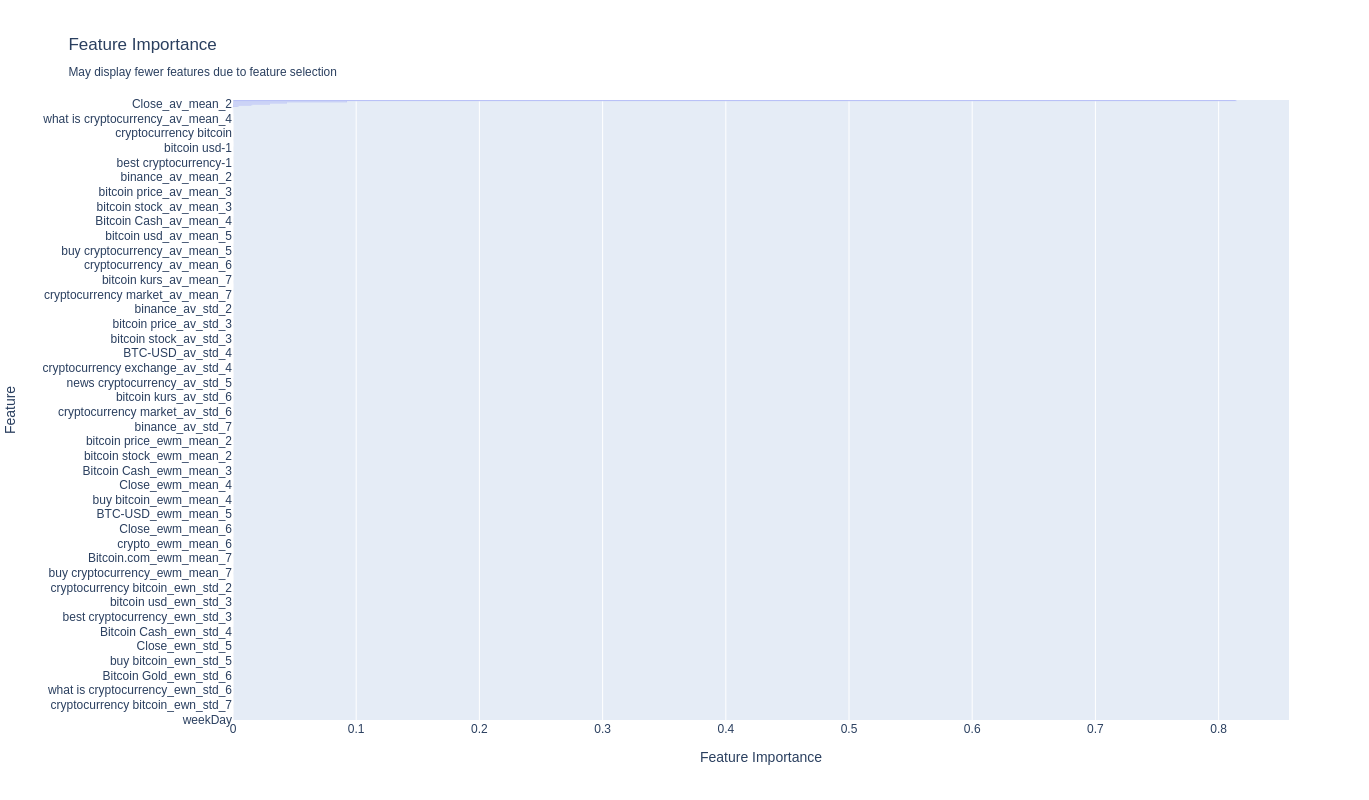

In [31]:
pipeline_0.graph_feature_importance()

In [24]:
best_pipeline

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Linear Regressor':{'fit_intercept': True, 'normalize': False, 'n_jobs': -1},})

In [16]:
best_pipeline = automl.best_pipeline
best_pipeline

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Linear Regressor':{'fit_intercept': True, 'normalize': False, 'n_jobs': -1},})

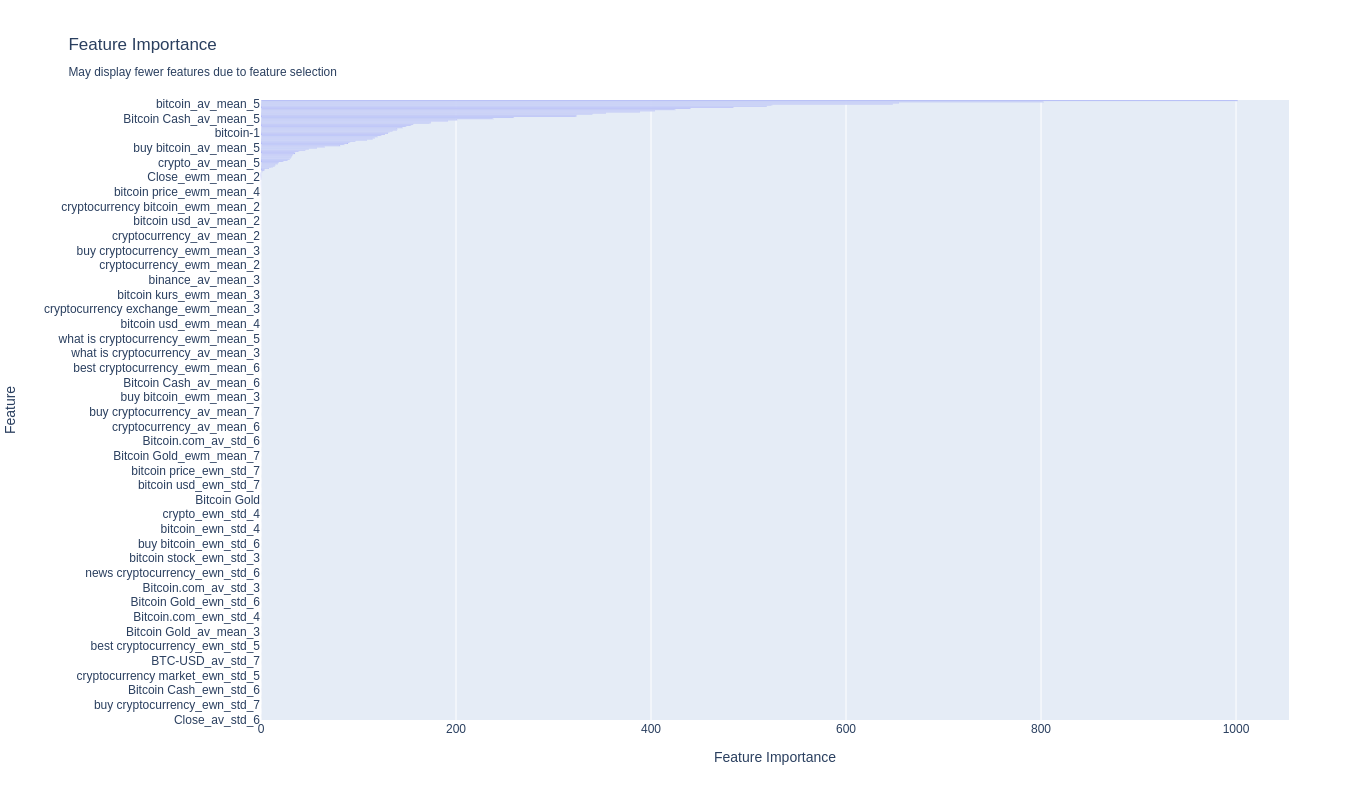

In [18]:
best_pipeline.graph_feature_importance()

In [58]:
prediction_test = best_pipeline.predict(X_test).to_series()
prediction_train = best_pipeline.predict(X_train).to_series()

In [60]:
prediction_train.index = y_train.index
prediction_test.index = y_test.index

In [27]:
error_test = prediction_test - y_test.values
error_train = prediction_train - y_train.values

In [85]:
def show_pred(y_train, y_test, y, title):
#     y_train_copy = pd.Series(y_train, index=y.index[:len(y_train)])
#     y_test_copy = pd.Series(y_test, index=y.index[-len(y_test):])
    y_test_copy = pd.Series(y_test)
    y_train_copy = pd.Series(y_train)
#     print(y_test_copy)
#     print(f'y_train_copy shape:\t{y_train_copy.shape}')
#     print(f'y_test_copy shape:\t{y_test_copy.shape}')
#     print(f'y shape:\t{y.shape}')
    
    plt.plot(y_train_copy, label='y_train_predicted')
    plt.plot(y_test_copy, label='y_test_predicted')
    plt.plot(y, label='y_real')
    plt.title(title)
    plt.legend()
    plt.show()

In [70]:
def tsplot(y, lags=None, figsize=(15, 13), style='bmh',title=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [67]:
error_test

2020-10-14    0.000342
2020-10-15    0.000087
2020-10-16    0.000224
2020-10-17   -0.000086
2020-10-18   -0.000160
                ...   
2021-04-07   -0.002007
2021-04-08   -0.001750
2021-04-09   -0.002230
2021-04-10   -0.001877
2021-04-11   -0.002016
Name: Close, Length: 180, dtype: float64

In [61]:
prediction_test

2020-10-14    4.241611
2020-10-15    4.242224
2020-10-16    4.246130
2020-10-17    4.235862
2020-10-18    4.237867
                ...   
2021-04-07    5.454304
2021-04-08    5.422984
2021-04-09    5.455987
2021-04-10    5.455197
2021-04-11    5.477243
Name: Close, Length: 180, dtype: float64

In [52]:
prediction_train

2016-04-29    2.571577
2016-04-30    2.576972
2016-05-01    2.570754
2016-05-02    2.574030
2016-05-03    2.567256
                ...   
2020-10-09    4.212424
2020-10-10    4.223699
2020-10-11    4.234637
2020-10-12    4.239689
2020-10-13    4.240469
Name: Close, Length: 1629, dtype: float64

In [67]:
pipeline['TranformTimeSeries'].lmbds

{'Close': 0.15465264713954702}

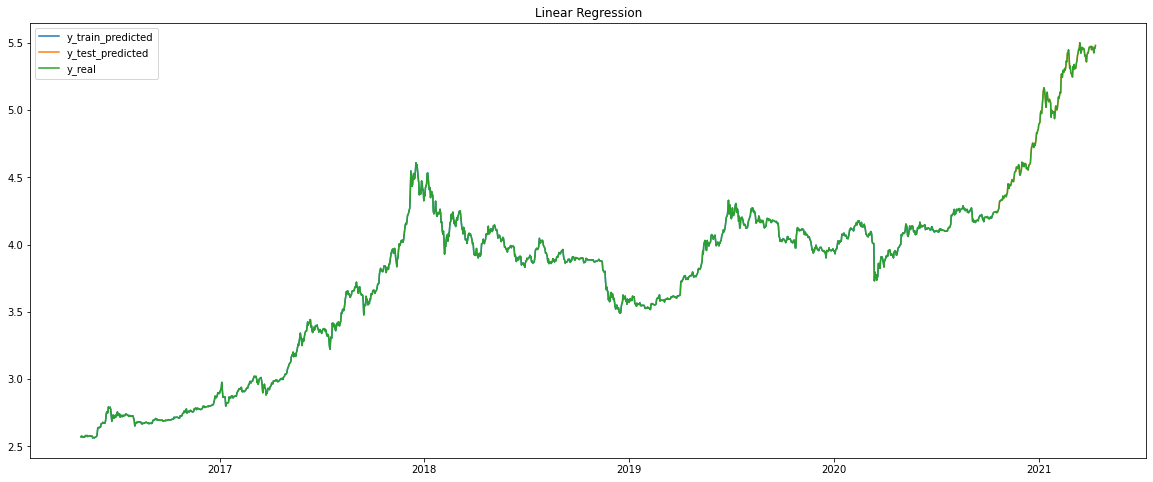

In [64]:
show_pred(y_train=prediction_train,
         y_test=prediction_test,
         y=y,
         title='Linear Regression')

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



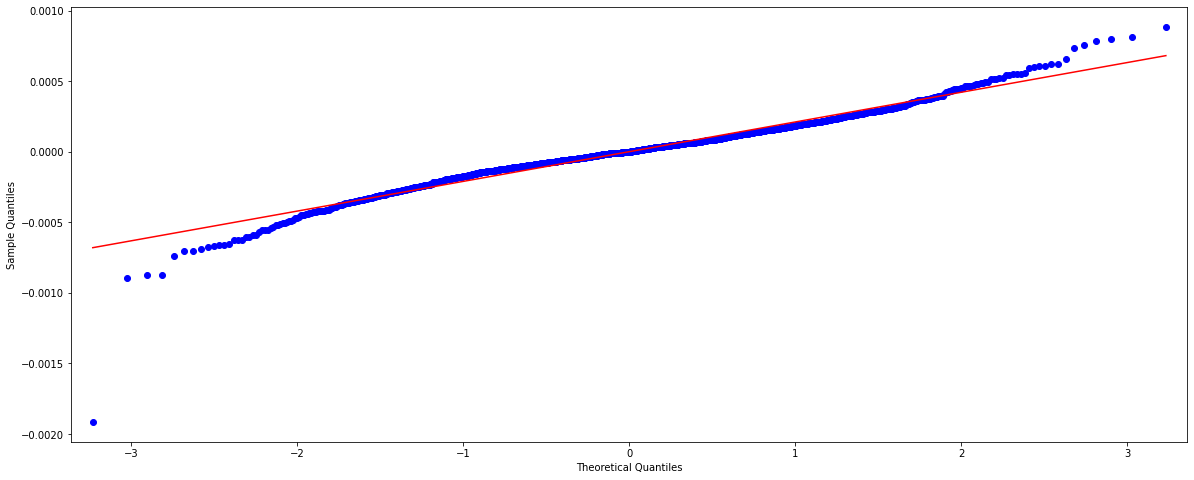

In [94]:
from statsmodels.graphics.gofplots import qqplot
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

# residuals = np.array(residuals)
qqplot(error_train, line='r')
plt.show()

In [35]:
best_pipeline.describe

<bound method PipelineBase.describe of GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Linear Regressor':{'fit_intercept': True, 'normalize': False, 'n_jobs': -1},})>

In [79]:
error_train.index = y_train.index
error_test.index = y_test.index

error_train.columns = ['Residual_train']
error_test.columns = ['Residual_test']

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



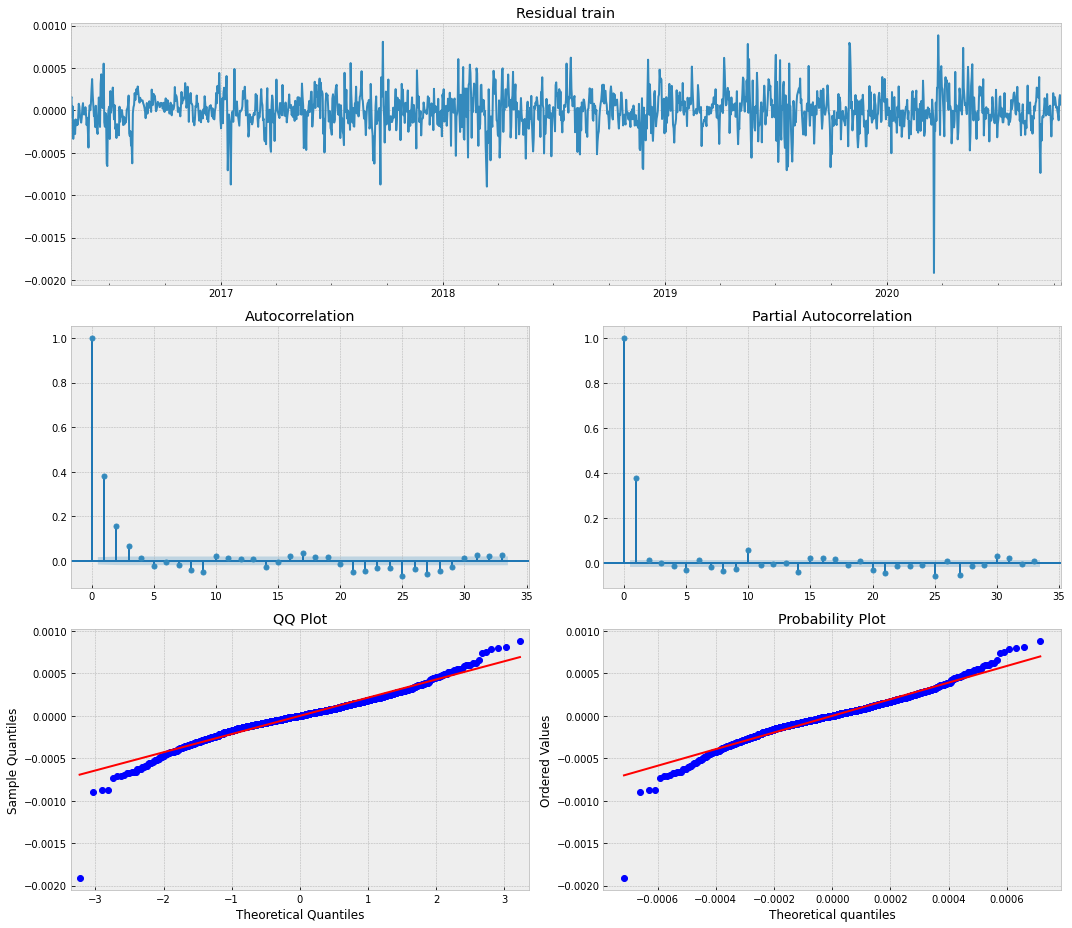

In [97]:
tsplot(error_train, title='Residual train')

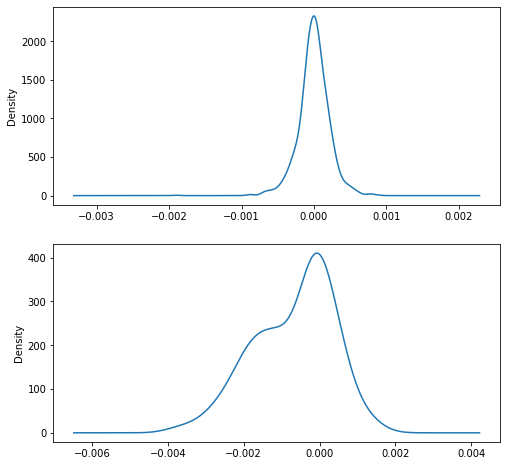

In [88]:
# plt.subplot()
# plt.figure()
# plt.figure(figsize=(16,8))
plt.subplot(211)
error_train.plot(kind='kde', figsize=(8,8), label='residual_train')
plt.subplot(212)
error_test.plot(kind='kde', figsize=(8,8), label='residual_test')
# plt.figure(figsize=(16,8))
plt.show()

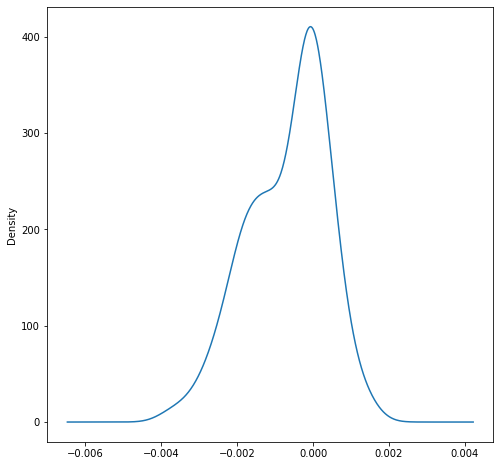

In [26]:
error_test.plot(kind='kde', figsize=(8,8))
plt.show()

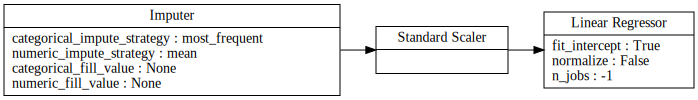

In [39]:
best_pipeline_no_text.graph()

# Show the best pipellines and outer featrues

In [40]:
automl.rankings['id'][:5].values

array([7, 3, 5, 2, 1])

In [42]:
n = 5
number_pipeline = automl.rankings['id'][:n].values

In [117]:
i = 0 
pipeline_0 = automl.get_pipeline(number_pipeline[i])

pipeline_0.fit(X_train, y_train)

prediction_test = pipeline_0.predict(X_test).to_series()
prediction_train = pipeline_0.predict(X_train).to_series()

prediction_train.index = y_train.index
prediction_test.index = y_test.index

error_test = prediction_test - y_test.values
error_train = prediction_train - y_train.values

In [76]:
automl.describe_pipeline(automl.rankings.iloc[i]['id'])

*************************************************
* Linear Regressor w/ Imputer + Standard Scaler *
*************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Linear Regressor
	 * fit_intercept : True
	 * normalize : False
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 11.2 seconds

Cross Validation
----------------
               R2   MAE   MSE  Root Mean Squared Error # Training # Validation
0           1.000 0.000 0.000                    0.000     1086.0        543.0
1           1.000 0.000 0.000                    0.000     1086.0        543.0
2           1.000 0.000 0.000                    0.000     1086.0        543.0
mean        1.000 0.000 0.000                    0.000          -            -
std 

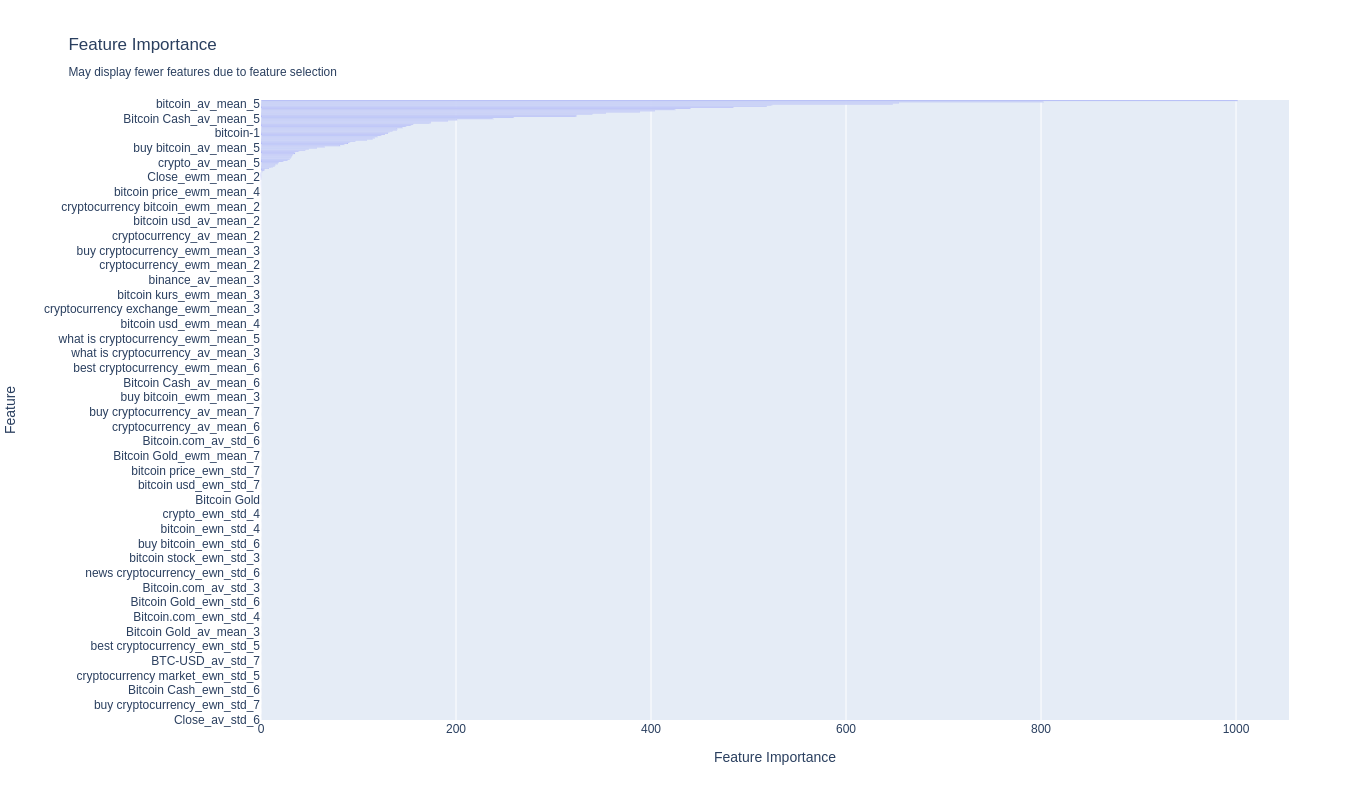

In [44]:
pipeline_0.graph_feature_importance()

In [82]:
pipeline_0.feature_importance[:5]

feature   importance
0  buy cryptocurrency_av_mean_5 -1001.600607
1  buy cryptocurrency_av_mean_4   802.295464
2       bitcoin stock_av_mean_5  -654.324859
3             bitcoin_av_mean_5   647.530910
4       bitcoin stock_av_mean_4   524.176869

In [74]:
def show_train_test_residual(error_train, error_test):
    plt.subplot(221)
    error_train.plot(kind='kde', figsize=(15,15), label='residual_train')
    plt.title('residual_train')

    plt.subplot(222)
    error_test.plot(kind='kde', figsize=(15,15), label='residual_test')
    plt.title('residual_test')
    plt.show()
    
    tsplot(error_train, title='Residual train')
    tsplot(error_test, title='Residual test')

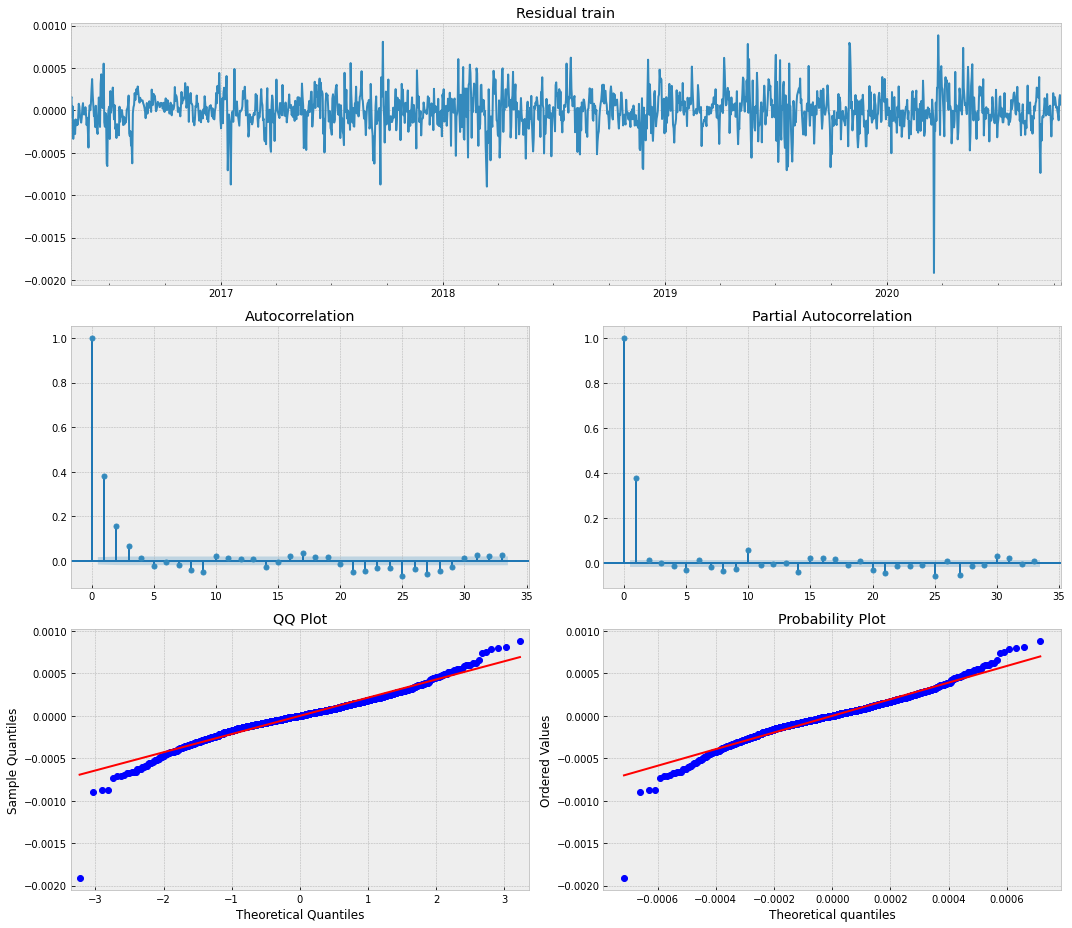

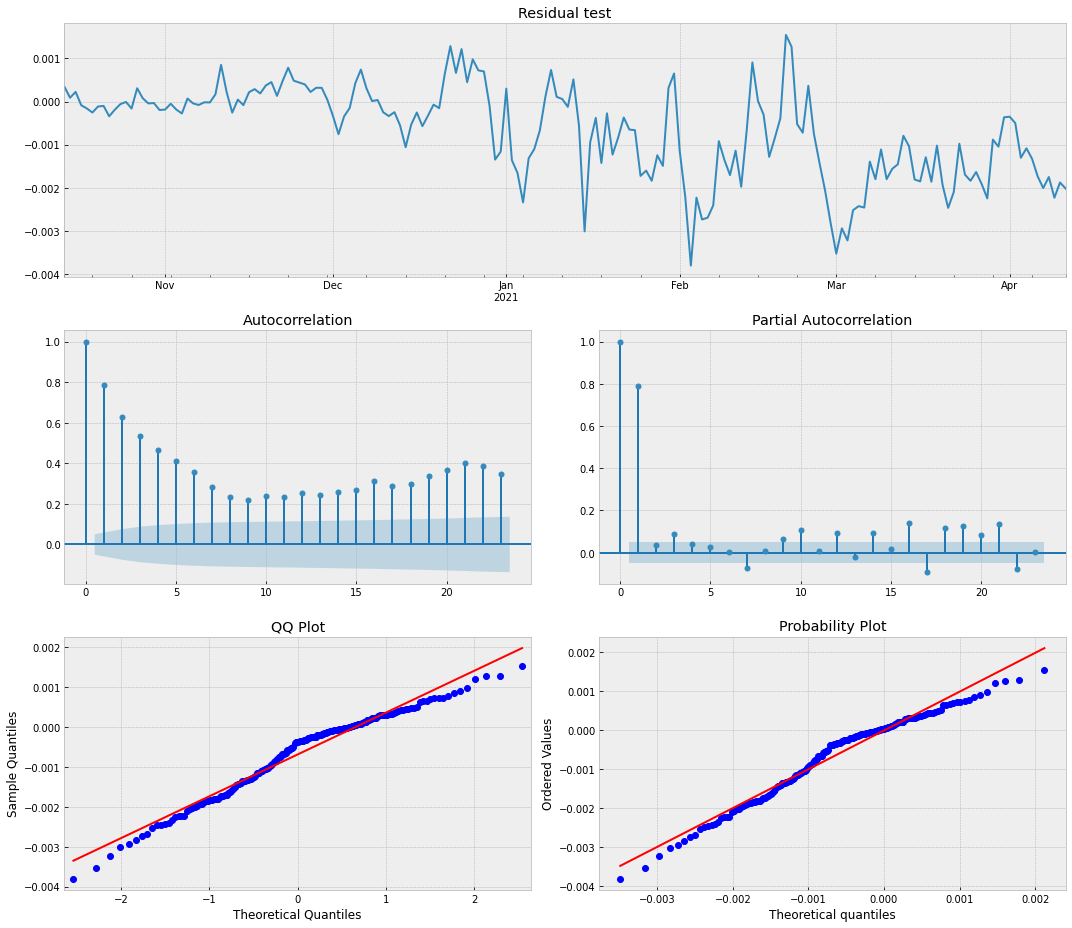

In [75]:
show_train_test_residual(error_train, error_test)

## Describing metrix for model resiiduals

In [81]:
print(error_test.describe())
print()
print(error_train.describe())

count    180.000000
mean      -0.000683
std        0.001052
min       -0.003803
25%       -0.001425
50%       -0.000368
75%        0.000061
max        0.001544
Name: Close, dtype: float64

count    1.629000e+03
mean    -4.184498e-14
std      2.144578e-04
min     -1.916049e-03
25%     -1.089188e-04
50%      2.548828e-07
75%      1.217453e-04
max      8.856545e-04
Name: Close, dtype: float64


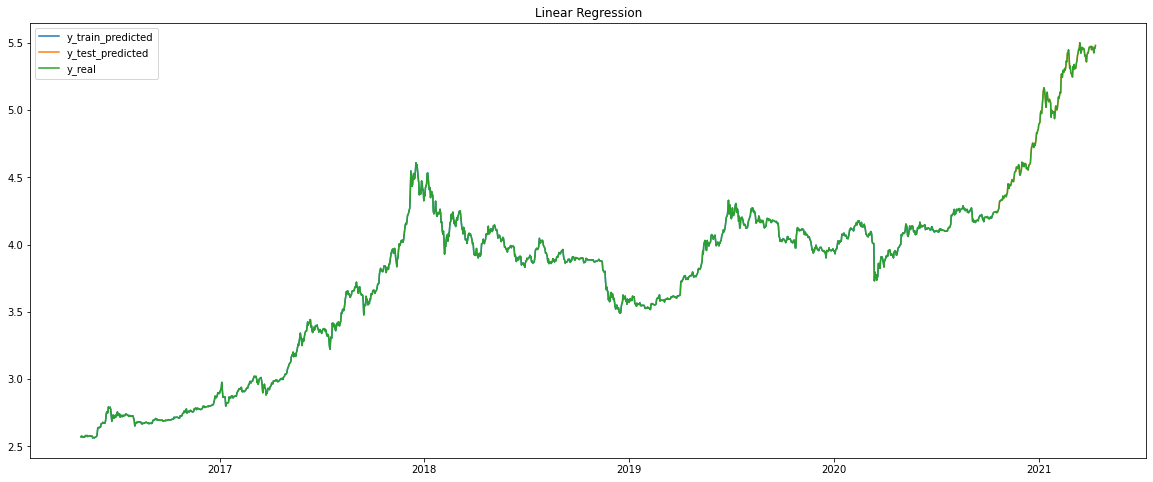

In [86]:
# plots on train and test data
show_pred(y_train=prediction_train,
         y_test=prediction_test,
         y=y,
         title='Linear Regression')

In [95]:
lmbds = pipeline['TranformTimeSeries'].lmbds
lmbds

{'Close': 0.15465264713954702}

In [87]:
from scipy.special import boxcox, inv_boxcox

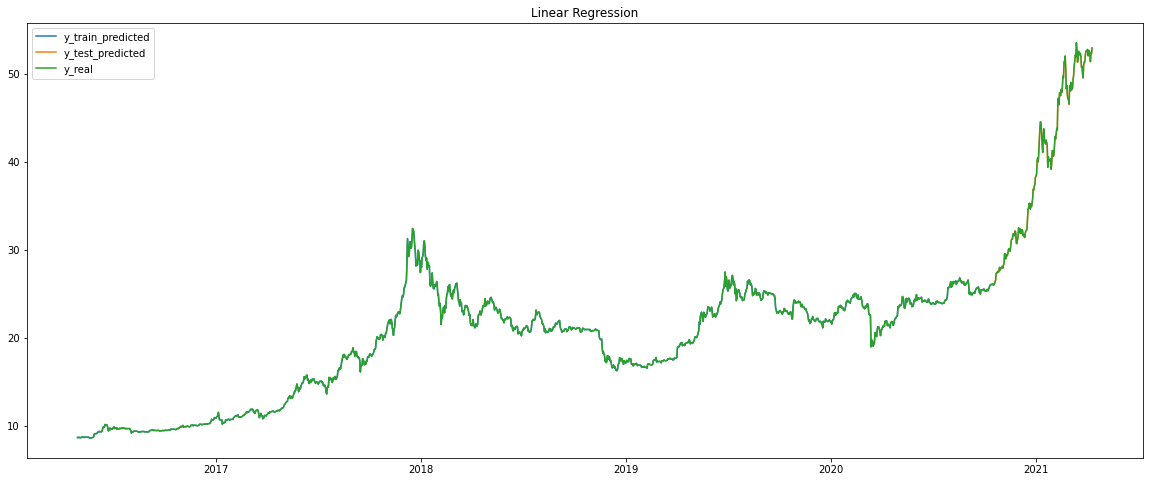

In [118]:
# show plots after retransformed data
lmbd = lmbds['Close']
inv_pred_train = inv_boxcox(prediction_train, lmbd)
inv_pred_test = inv_boxcox(prediction_test, lmbd)
# inv_y_train = inv_boxcox(y_train)
# inv_y_test = inv_boxcox(y_test)
inv_y = inv_boxcox(y, lmbd)

show_pred(y_train=inv_pred_train,
         y_test=inv_pred_test,
         y=inv_y,
         title='Linear Regression')

In [ ]:
inverse_error_train = 

In [112]:
# Metrix for model after transformin to real values
define_metrics(inv_y, prediction_train, prediction_test, name='Linar')

name       r2  sum_squared_resid      MAPE      RMSE  durbin_watson  \
0  Linar_train  1.00000      434482.781606  0.004266  0.000214       1.239041   
0   Linar_test  0.99999      233147.618173  0.018170  0.001252       0.293589   

   theil_index    ex_var  
0     0.689308  1.000000  
0     1.244886  0.999993

In [111]:
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import explained_variance_score
import numpy as np

def define_metrics(y, predicted_train, predicted_test, name):
    pred_train_ = predicted_train
    pred_test_ = predicted_test
    y_train_ = y[:len(predicted_train)]
    y_test_ = y[-len(predicted_train):]

    metric_train = pd.DataFrame()
    metric_train['name'] = [name + '_train']
    metric_train['r2'] = [r2_score(y_train, pred_train_)]
    metric_train['sum_squared_resid'] = np.sum((y_train_ - pred_train_)**2)
    metric_train['MAPE'] = [np.mean(np.abs((y_train - pred_train_) / y_train)) * 100]
    metric_train['RMSE'] = [np.sqrt(np.mean((y_train - pred_train_)**2))]
    metric_train['durbin_watson'] = [durbin_watson(y_train - pred_train_)]
    metric_train['theil_index'] = [np.sqrt((1/len(pred_train_))*np.sum((y_train_-pred_train_)**2))
                                      / (np.sqrt((1/len(y_train_))*np.sum(y_train_**2)) + np.sqrt((1/len(pred_train_))*np.sum(pred_train_**2)))]
    
    metric_train['ex_var'] = [explained_variance_score(y_train, pred_train_)]

        
    metric_test = pd.DataFrame()
    metric_test['name'] = [name + '_test']
    metric_test['r2'] = [r2_score(y_test, pred_test_)]
    metric_test['sum_squared_resid'] = np.sum((y_test_ - pred_test_)**2)
    
    metric_test['MAPE'] = [np.mean(np.abs((y_test - pred_test_) / y_test)) * 100]
    
    metric_test['RMSE'] = [np.sqrt(np.mean((y_test - pred_test_) ** 2))]
    metric_test['durbin_watson'] = [durbin_watson(y_test - pred_test_)]
    metric_test['theil_index'] = [np.sqrt((1/len(pred_test_))*np.sum((y_test_-pred_test_)**2))
                                      / (np.sqrt((1/len(y_test_))*np.sum(y_test_**2)) + np.sqrt((1/len(pred_test_))*np.sum(pred_test_**2)))]
    
    metric_test['ex_var'] = [explained_variance_score(y_test, pred_test_)]
    

    return metric_train.append(metric_test)

In [119]:
inv_error_test = inv_y[-len(inv_pred_train):] - inv_pred_test
inv_error_train = inv_y[:len(inv_pred_train)] - inv_pred_train

In [114]:
inv_pred_test

2016-04-29   -0.000774
2016-04-30   -0.000997
2016-05-01    0.000529
2016-05-02   -0.000296
2016-05-03    0.002085
                ...   
2020-10-09    0.001808
2020-10-10   -0.001925
2020-10-11   -0.002842
2020-10-12   -0.002487
2020-10-13   -0.001074
Name: Close, Length: 1629, dtype: float64

In [121]:
inv_error_test

2016-10-26         NaN
2016-10-27         NaN
2016-10-28         NaN
2016-10-29         NaN
2016-10-30         NaN
                ...   
2021-04-07    0.056861
2021-04-08    0.048879
2021-04-09    0.063231
2021-04-10    0.053197
2021-04-11    0.057732
Name: Close, Length: 1629, dtype: float64

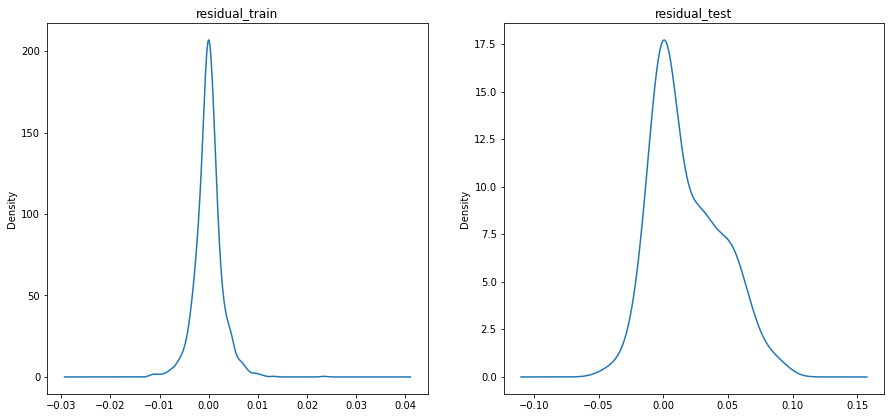

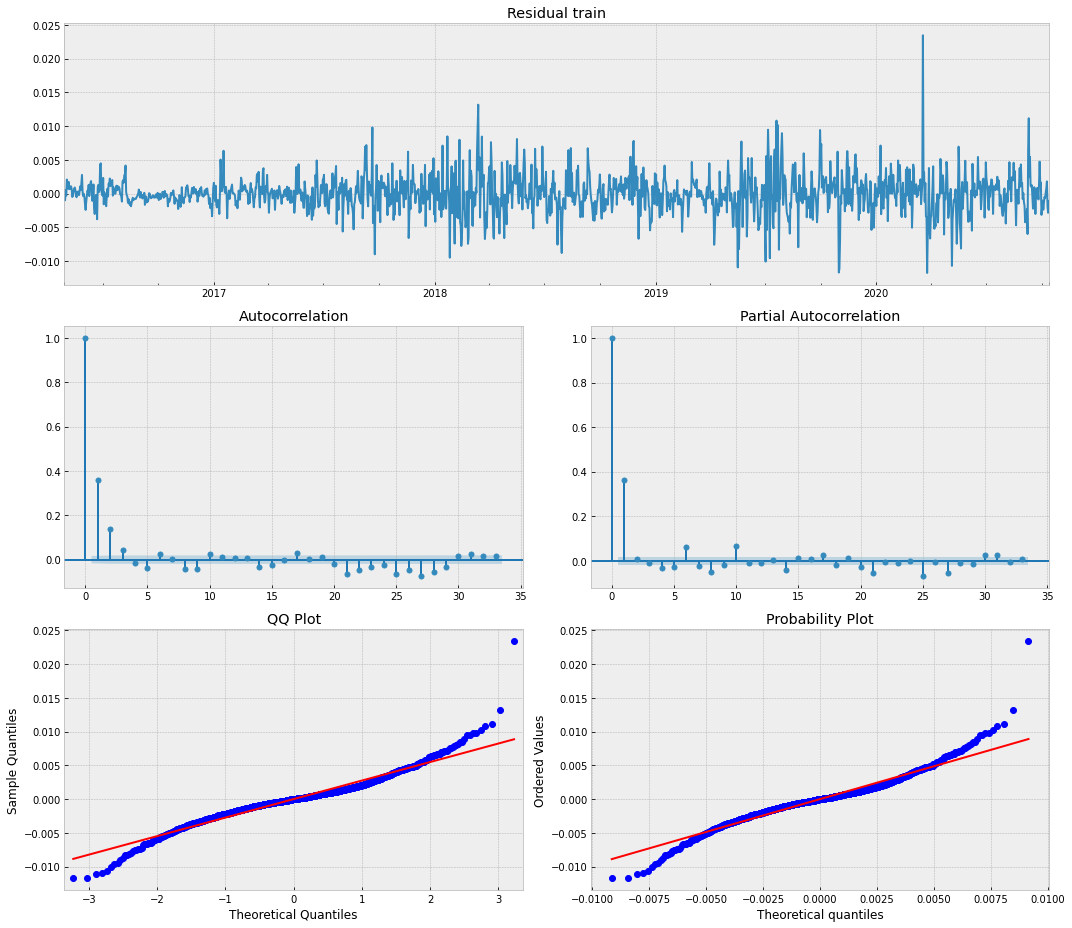

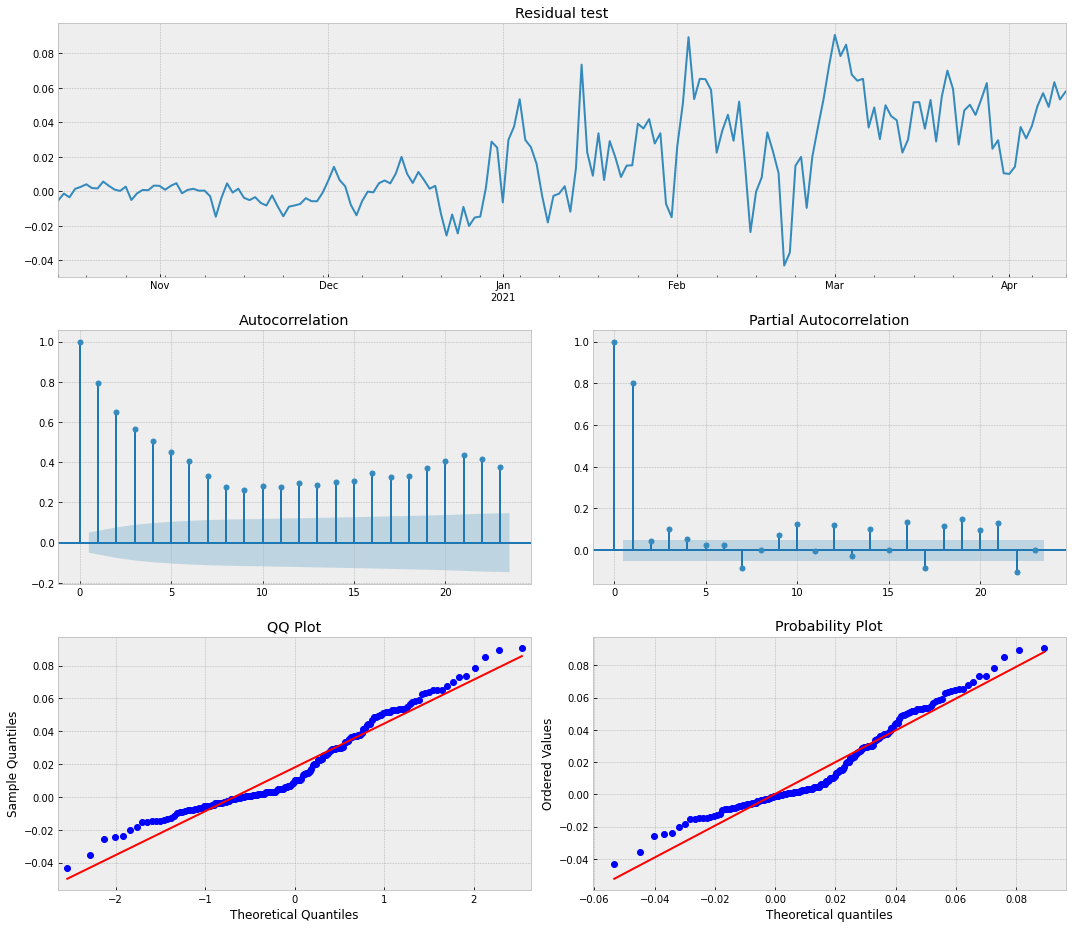

In [122]:
show_train_test_residual(inv_error_train, inv_error_test.dropna())